This Lab exercise is to get your hands dirty with some code. <br> It's important you understand the concepts as they'll be important in Deep Reinforcement Learning

## Linear regression
In linear regression, the relationships are modeled using linear functions whose unknown model parameters are estimated from the data. <br> We'll play around with a popular dataset of wine. <br> In dataset based on multiple features you'll determine the quality of wine.

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

Load dataset

In [2]:
dataset = pd.read_csv('winequality-red.csv',sep=';')

Check how it looks actually, other popular way to do is calling the head() function. Please refer to pandas for more details

In [3]:
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Sometimes dataset can be too huge to display, the shape comes in handy to check how your dataset looks, <br> in current example there are 1599 rows and 12 columns. <br> When working with image dataset the shape maybe in channels like RGB and number of images or 1 channel if it's black and white image

In [4]:
dataset.shape

(1599, 12)

When working with stastical problems describe can give you quick insights. (here it's just to show you some functionalities of pandas)

In [5]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


real world data is not as clean as this one, **ALWAYS KNOW YOUR DATA** . We check here just in case if there are null values that we may have to remove or fill

In [6]:
dataset.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

Define features

In [7]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']

Defining your data and labels

In [8]:
X = dataset[features].values
y = dataset['quality'].values

We would want to see the distribution of data so we know how imbalanced it is. you can read a lot about imbalance in detail. **It's good and bad ;)** Here we we'll contine playing with this imbalanced data

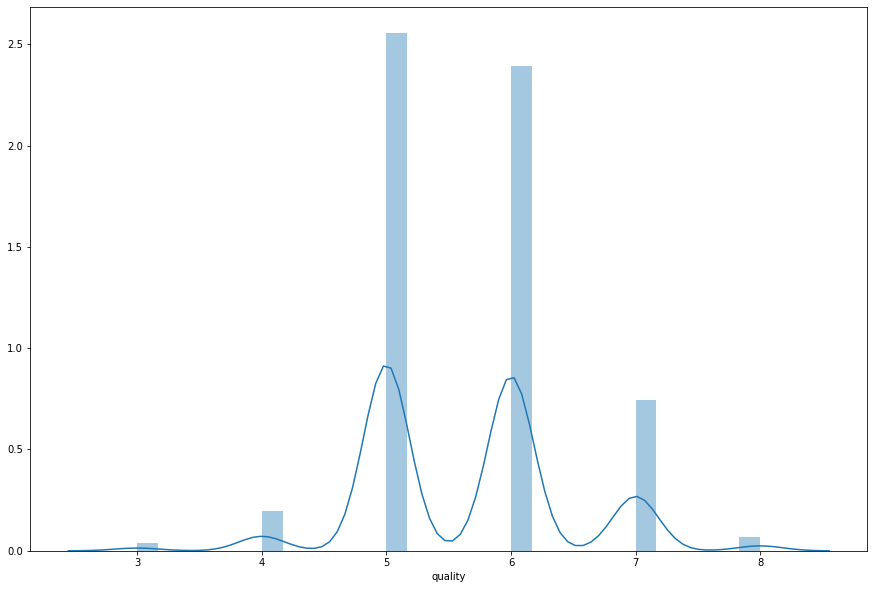

In [9]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(dataset['quality'])

Here we just plot how these 3 features varry for different classes. If you are a wine lover you'll probably know this 

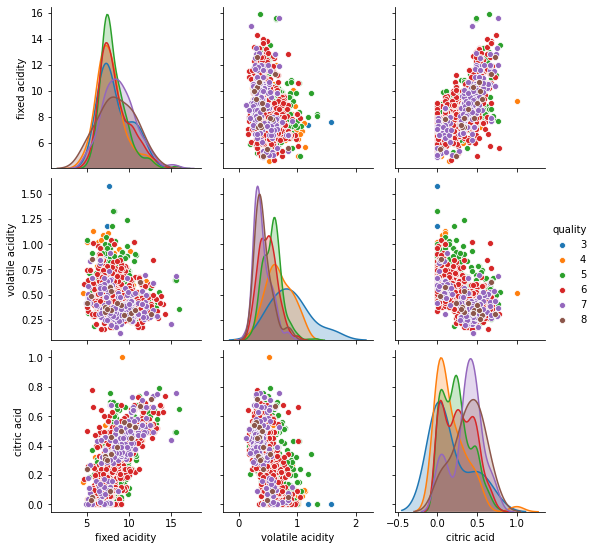

In [10]:
relationship = sns.pairplot(dataset, vars=['fixed acidity','volatile acidity','citric acid'], hue='quality')
plt.show(relationship)

Stop and think why do we have train and test set. If you don't know contact any of the teaching assistant to explain you. 

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**FINALLY** <br> in this example we just used default parameters. you can have fun with them 

In [12]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Apart from just estimating a function linear regression has lot many uses. It's one of the favorate tools used in reporting. We are just trying to explain the relation of a wine with different features here

In [13]:
coeff_df = pd.DataFrame(regressor.coef_, features, columns=['Coefficient'])  
coeff_df

,Coefficient
fixed acidity,0.041284
volatile acidity,-1.149528
citric acid,-0.177927
residual sugar,0.027870
chlorides,-1.873407
free sulfur dioxide,0.002684
total sulfur dioxide,-0.002777
density,-31.516666
pH,-0.254486
sulphates,0.924040


In [14]:
y_pred = regressor.predict(X_test)

In [15]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)

Let's check how you performed shall we?

In [16]:
df1

,Actual,Predicted
0,6,5.782930
1,5,5.036193
2,7,6.596989
3,6,5.339126
4,5,5.939529
5,6,5.007207
6,5,5.396162
7,6,6.052112
8,4,4.867603
9,5,4.950676


Will you be able to explain the graph?

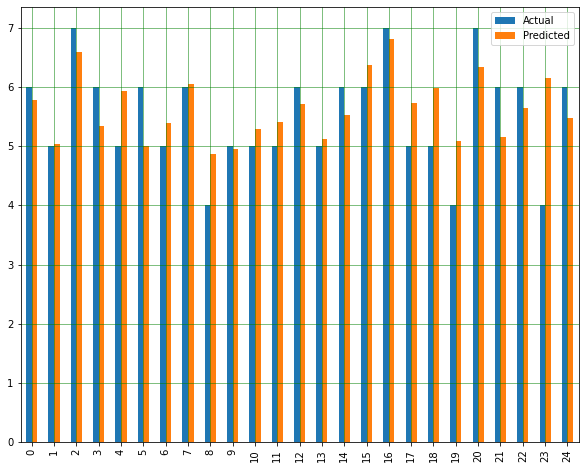

In [17]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Here we report common matrices i.e how close we can predict to data.

In [18]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.46963309286610944
Mean Squared Error: 0.38447119782012323
Root Mean Squared Error: 0.6200574149384259


## Decision Tree
You can choose to read more about them here (https://en.wikipedia.org/wiki/Decision_tree) but in short they are like flowchart where you get the final class based on features. Decisions and their possible consequences are because of your features.

In [19]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [20]:
x = dataset.drop('quality',axis=1)
y = dataset['quality']

In [21]:
clfTre = tree.DecisionTreeClassifier(max_depth=5)
clfTre.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [22]:
utfall = np.count_nonzero(clfTre.predict(X_test) == y_test)
print("The decision tree predicts the test data in", utfall/(len(X_test))*100 , "% of the cases.")

The decision tree predicts the test data in 59.06249999999999 % of the cases.


Are we performing better or worst compared to Linear regression? If worst, what can we do? Think about it...

## Random Forest
Random forests or random decision forests are an ensemble method. They are a form of decision tree, except they construct multitude of decision trees at training time and output the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests correct for decision trees' habit of overfitting to their training set

In [23]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [24]:
utfall = np.count_nonzero(rf.predict(X_test) == y_test)
print("The decision tree predicts the test data in", utfall/(len(X_test))*100 , "% of the cases.")

The decision tree predicts the test data in 71.875 % of the cases.


## MLP
Multilayer perceptron are type of neuralnets. A single layer without activation function behaves quiet closely like linear regression.
I'm sure you guys had fun uptill this point. <br>
For upcoming DRL classes it's very important that you develop a good intuition for MLP, CNNs. <br>
We want you to run this code and compare with classical algorithms we used previously. 
Do notice what, how it's learning and since you know your dataset what more/less can be done? <br>
Don't forget **Always know your data** 

In [25]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

import torch
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable


In [26]:
class Net(nn.Module):
    # define nn
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(11, 100)
        self.fc2 = nn.Linear(100, 100)
        self.fc3 = nn.Linear(100, 6)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, X):
        X = F.relu(self.fc1(X))
        X = self.fc2(X)
        X = self.fc3(X)
        X = self.softmax(X)

        return X

In [27]:
dataset = pd.read_csv('winequality-red.csv', sep=';')

In [28]:
dataset['quality'] = str(dataset['quality'])

In [29]:
unique_labels = np.unique(dataset['quality'].values)
le = preprocessing.LabelEncoder()
le.fit(unique_labels)
labels = le.transform(dataset['quality'])

In [30]:
train_X, test_X, train_y, test_y = train_test_split(dataset[features].values,
                                                    labels, test_size=0.8)

In [31]:
train_X = Variable(torch.Tensor(train_X).float())
test_X = Variable(torch.Tensor(test_X).float())
train_y = Variable(torch.Tensor(train_y).long())
test_y = Variable(torch.Tensor(test_y).long())

In [32]:
net = Net()

criterion = nn.CrossEntropyLoss()# cross entropy loss

optimizer = torch.optim.SGD(net.parameters(), lr=0.01)

In [33]:
for epoch in range(1000):
    optimizer.zero_grad()
    out = net(train_X)
    loss = criterion(out, train_y)
    loss.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print('number of epoch', epoch, 'loss', loss.data)

predict_out = net(test_X)
_, predict_y = torch.max(predict_out, 1)

print ('prediction accuracy', accuracy_score(test_y.data, predict_y.data))

print ('macro precision', precision_score(test_y.data, predict_y.data, average='macro'))
print ('micro precision', precision_score(test_y.data, predict_y.data, average='micro'))
print ('macro recall', recall_score(test_y.data, predict_y.data, average='macro'))
print ('micro recall', recall_score(test_y.data, predict_y.data, average='micro'))

number of epoch 0 loss tensor(2.0128)
number of epoch 100 loss tensor(1.0457)
number of epoch 200 loss tensor(1.0446)
number of epoch 300 loss tensor(1.0442)
number of epoch 400 loss tensor(1.0441)
number of epoch 500 loss tensor(1.0440)
number of epoch 600 loss tensor(1.0439)
number of epoch 700 loss tensor(1.0438)
number of epoch 800 loss tensor(1.0438)
number of epoch 900 loss tensor(1.0438)
prediction accuracy 1.0
macro precision 1.0
micro precision 1.0
macro recall 1.0
micro recall 1.0
